In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
folder_task1 = '/home/xingguang/Documents/ECE661/Task1_Images/'
view_1 = os.path.join(folder_task1, 'painting1.jpeg')
view_2 = os.path.join(folder_task1, 'painting2.jpeg')
view_3 = os.path.join(folder_task1, 'painting3.jpeg')
kitten = os.path.join(folder_task1, 'kittens.jpeg')
img_1 = cv2.cvtColor(cv2.imread(view_1), cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(cv2.imread(view_2), cv2.COLOR_BGR2RGB)
img_3 = cv2.cvtColor(cv2.imread(view_3), cv2.COLOR_BGR2RGB)
img_k = cv2.cvtColor(cv2.imread(kitten), cv2.COLOR_BGR2RGB)

In [3]:
def choosePQRS(view=1):
    if view == 1:
        P = [298, 510]
        Q = [237, 1605]
        S = [1776, 357]
        R = [1684, 1826]
    if view == 2:
        P = [342, 696]
        Q = [333, 2328]
        S = [1884, 753]
        R = [1881, 2004]
    if view == 3:
        P = [109, 439]
        Q = [116, 1366]
        S = [1215, 305]
        R = [1096, 1861]
    if view == 4:
        P = [90, 192]
        Q = [90, 1118]
        S = [1796, 192]
        R = [1796, 1118]
    return np.asarray([P, Q, S, R])

In [4]:
def findHomoproj(source, target):
    def F_unit(source_point, target_point):
        x, y = source_point[0], source_point[1]
        x_, y_ = target_point[0], target_point[1]
        return np.asarray([[x, y, 1, 0, 0, 0, -x*x_, -y*x_], 
                        [0, 0, 0, x, y, 1, -x*y_, -y*y_]])
    F_list = [F_unit(source[i], target[i]) for i in range(4)]
    F = np.concatenate(F_list, axis=0)
    T_span = target.reshape((-1,1))
    H_param = np.matmul(np.linalg.inv(F), T_span)
    H = np.ones((9, 1))
    H[:8, :] = H_param
    return H.reshape((3, 3))

In [5]:
def projTransform(H, source):
    nps = source.shape[0]
    source_rep = np.concatenate((source, np.ones((nps,1))), axis=1)
    t_homo = np.matmul(H, source_rep.T).T
    t_norm = t_homo / t_homo[:,2].reshape((nps,1))
    return np.rint(t_norm[:,:2])

In [6]:
def projRange(source, target, H, srange):
    img_copy = np.copy(source)
    mask = np.zeros_like(source)
    mask = cv2.fillPoly(mask,[srange],(255,255,255))
    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            if any(mask[i][j]) > 0:
                coor_source = np.asarray([[j, i]])
                coor_target = projTransform(H, coor_source).squeeze()
                img_copy[i,j,:] = target[int(coor_target[1]), int(coor_target[0]),:]
    return img_copy, mask

In [7]:
range_1 = choosePQRS(1)
range_2 = choosePQRS(2)
range_3 = choosePQRS(3)
range_4 = choosePQRS(4)
H_1k = findHomoproj(range_1, range_4)
H_2k = findHomoproj(range_2, range_4)
H_3k = findHomoproj(range_3, range_4)

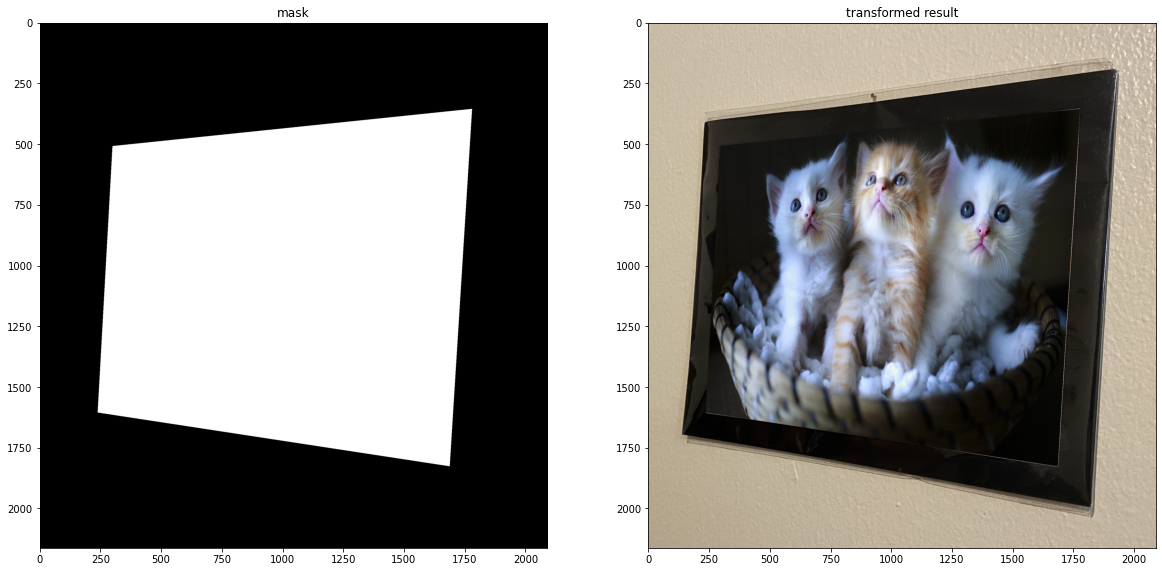

In [8]:
result, mask = projRange(img_1, img_k, H_1k, srange=range_1[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

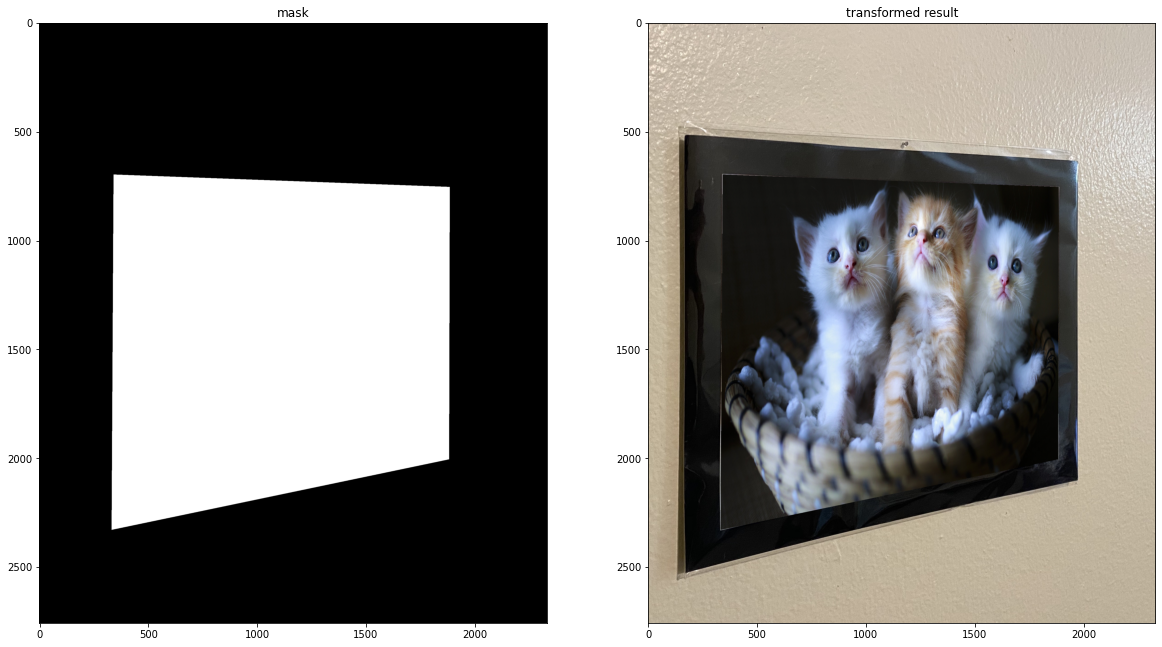

In [9]:
result, mask = projRange(img_2, img_k, H_2k, srange=range_2[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

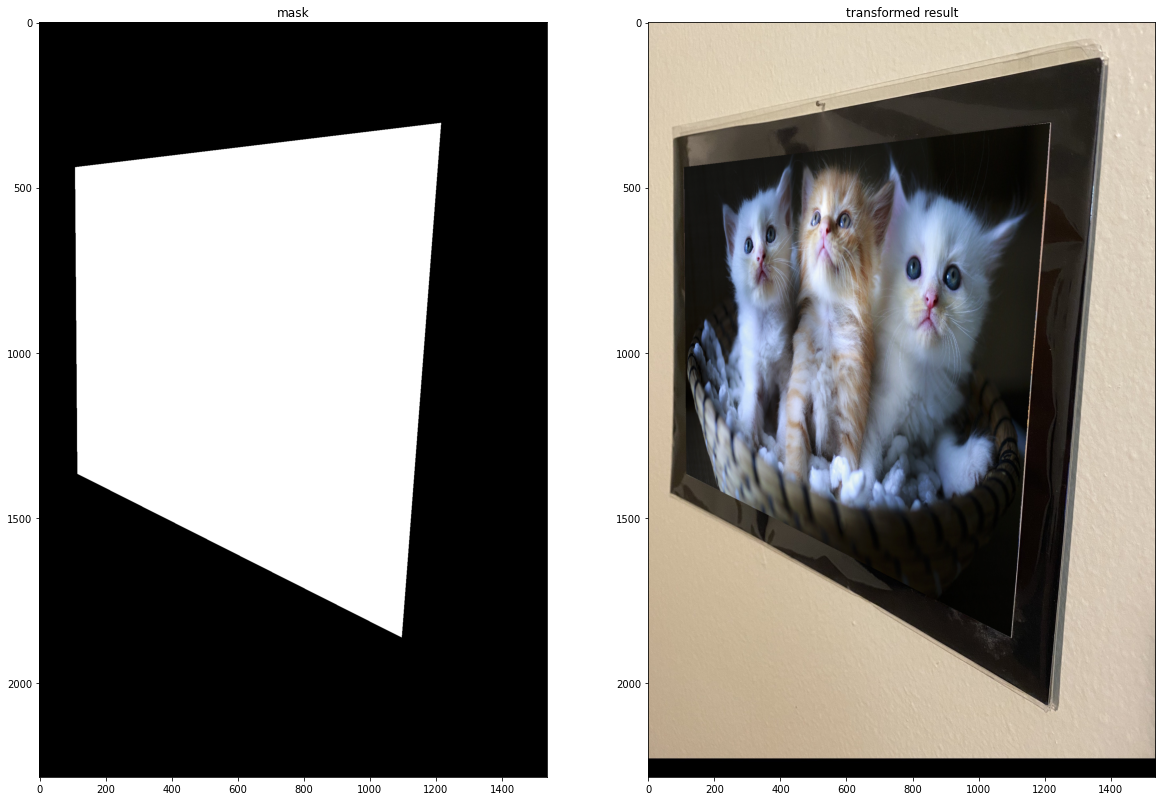

In [10]:
result, mask = projRange(img_3, img_k, H_3k, srange=range_3[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

In [11]:
H_12 = findHomoproj(range_2, range_1)
H_23 = findHomoproj(range_3, range_2)
H_13 = np.matmul(H_12, H_23)
print('projective matrix from 2 to 1:', H_12)
print('projective matrix from 3 to 2:', H_23)
print('projective matrix from 3 to 1:', H_13)

projective matrix from 2 to 1: [[ 4.26340692e-01 -3.07284127e-02  1.48322190e+02]
 [-2.04622815e-01  6.20615140e-01  1.04809050e+02]
 [-2.54660200e-04  3.36380696e-06  1.00000000e+00]]
projective matrix from 3 to 2: [[ 3.90635529e+00 -6.92689148e-02 -2.11170530e+01]
 [ 1.21885789e+00  1.71365126e+00 -1.23483014e+02]
 [ 1.25629005e-03 -9.70131542e-05  1.00000000e+00]]
projective matrix from 3 to 1: [[ 1.81432034e+00 -9.65791439e-02  1.43113568e+02]
 [ 8.87828129e-02  1.06752406e+00  3.24946527e+01]
 [ 2.65596834e-04 -7.36087264e-05  1.00496230e+00]]


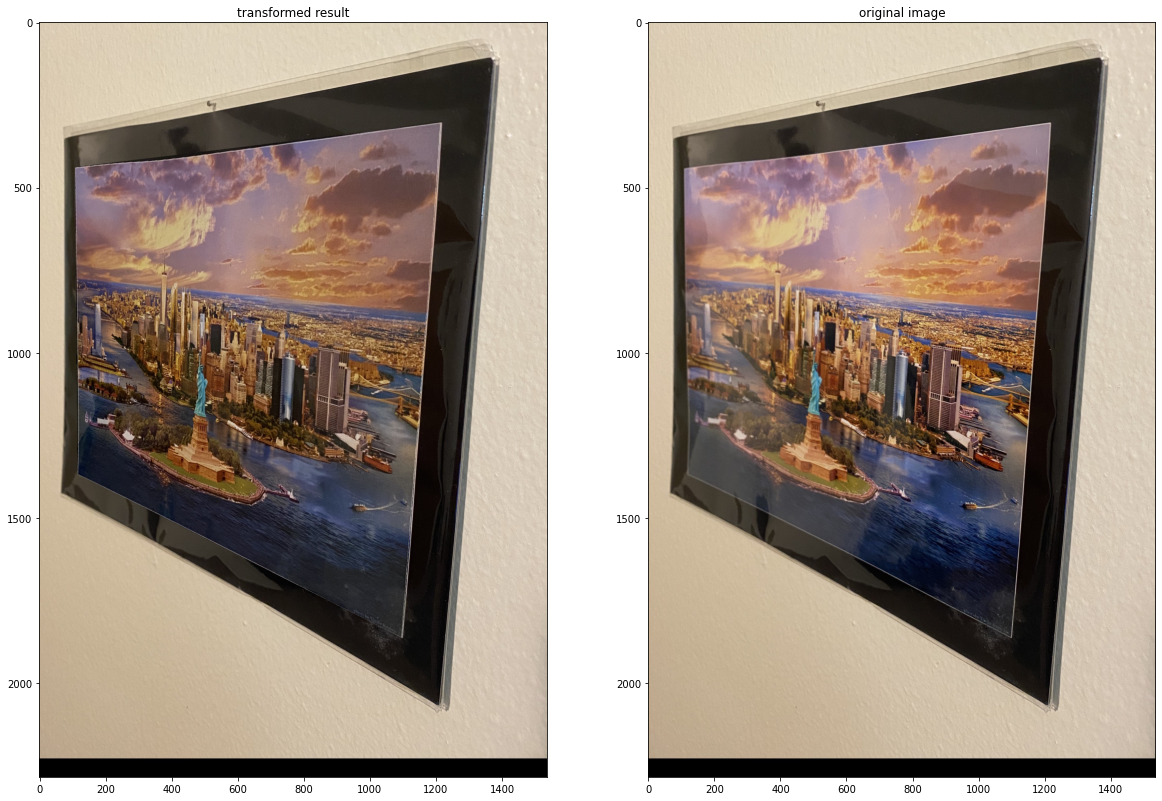

In [12]:
result, mask = projRange(img_3, img_1, H_13, srange=range_3[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('transformed result')
plt.imshow(result)
plt.subplot(122)
plt.title('original image')
plt.imshow(img_3)

In [13]:
folder_task2 = '/home/xingguang/Documents/ECE661/Task2_Images/'
view_1 = os.path.join(folder_task2, 'kitten1.jpg')
view_2 = os.path.join(folder_task2, 'kitten2.jpg')
view_3 = os.path.join(folder_task2, 'kitten3.jpg')
peppa = os.path.join(folder_task2, 'peppa.png')
img_1 = cv2.cvtColor(cv2.imread(view_1), cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(cv2.imread(view_2), cv2.COLOR_BGR2RGB)
img_3 = cv2.cvtColor(cv2.imread(view_3), cv2.COLOR_BGR2RGB)
img_p = cv2.cvtColor(cv2.imread(peppa), cv2.COLOR_BGR2RGB)

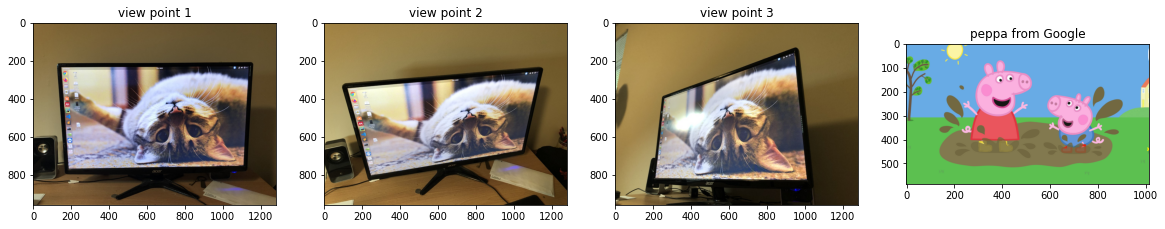

In [14]:
plt.figure(figsize=(20,80))
plt.subplot(141)
plt.title('view point 1')
plt.imshow(img_1)
plt.subplot(142)
plt.title('view point 2')
plt.imshow(img_2)
plt.subplot(143)
plt.title('view point 3')
plt.imshow(img_3)
plt.subplot(144)
plt.title('peppa from Google')
plt.imshow(img_p)

In [15]:
def choosePQRS_2(view=1):
    if view == 1:
        P = [149, 234]
        Q = [187, 768]
        S = [1135, 228]
        R = [1108, 753]
    if view == 2:
        P = [123, 344]
        Q = [247, 804]
        S = [1131, 254]
        R = [1042, 672]
    if view == 3:
        P = [258, 397]
        Q = [212, 818]
        S = [943, 156]
        R = [1011, 831]
    if view == 4:
        P = [24, 21]
        Q = [24, 517]
        S = [906, 21]
        R = [906, 517]
    return np.asarray([P, Q, S, R])

In [16]:
range_1 = choosePQRS_2(1)
range_2 = choosePQRS_2(2)
range_3 = choosePQRS_2(3)
range_4 = choosePQRS_2(4)
H_1p = findHomoproj(range_1, range_4)
H_2p = findHomoproj(range_2, range_4)
H_3p = findHomoproj(range_3, range_4)

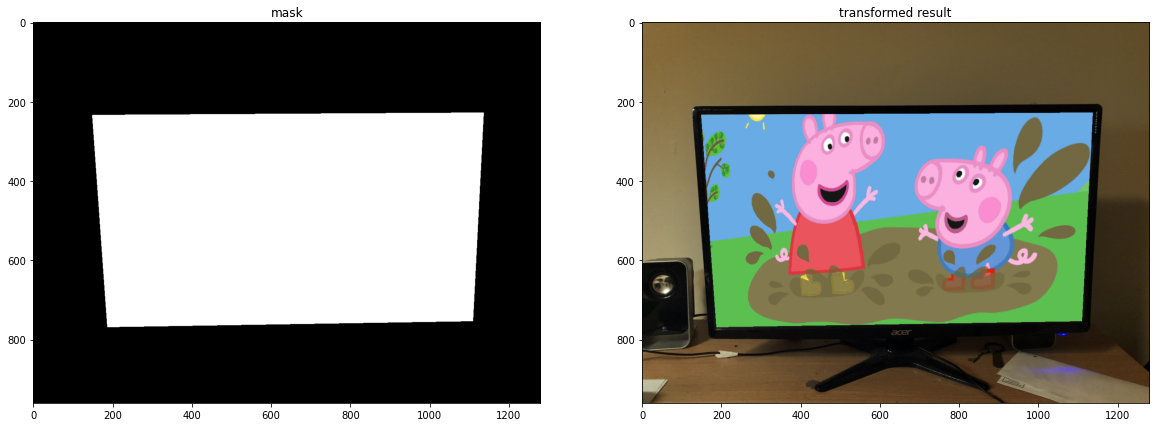

In [17]:
result, mask = projRange(img_1, img_p, H_1p, srange=range_1[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

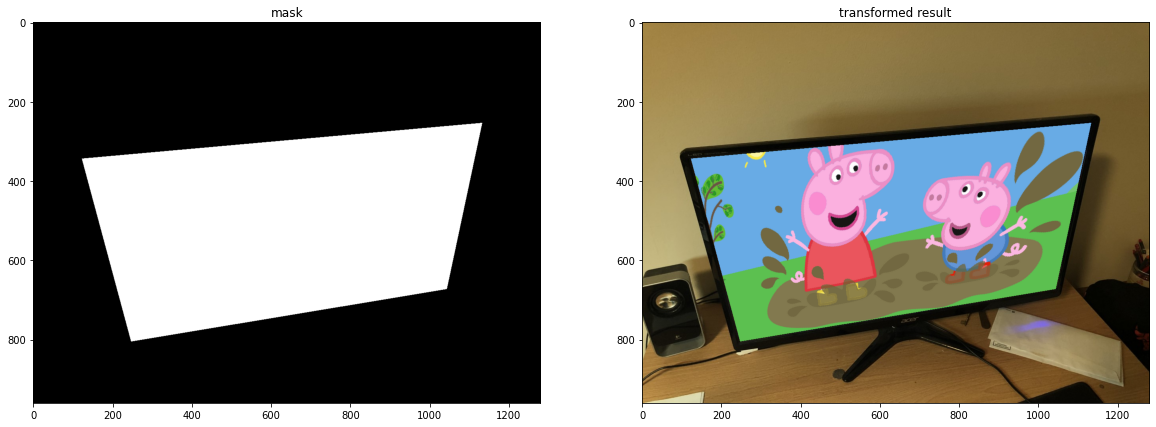

In [18]:
result, mask = projRange(img_2, img_p, H_2p, srange=range_2[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

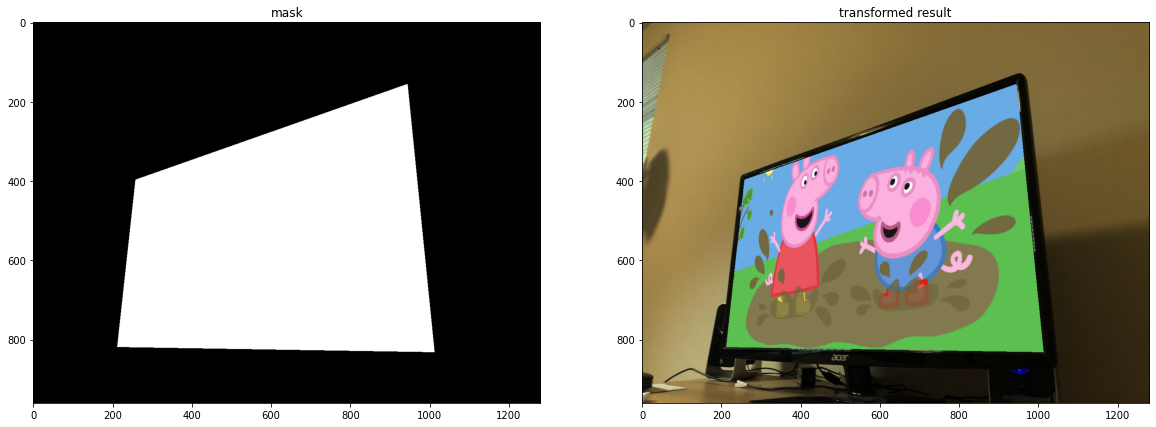

In [19]:
result, mask = projRange(img_3, img_p, H_3p, srange=range_3[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('mask')
plt.imshow(mask)
plt.subplot(122)
plt.title('transformed result')
plt.imshow(result)

In [20]:
H_12 = findHomoproj(range_2, range_1)
H_23 = findHomoproj(range_3, range_2)
H_13 = np.matmul(H_12, H_23)
print('projective matrix from 2 to 1:', H_12)
print('projective matrix from 3 to 2:', H_23)
print('projective matrix from 3 to 1:', H_13)

projective matrix from 2 to 1: [[ 7.04246619e-01 -1.77652949e-01  1.06137840e+02]
 [ 3.42429738e-02  7.66739218e-01 -6.12216597e+01]
 [-1.52366064e-04 -2.84064834e-04  1.00000000e+00]]
projective matrix from 3 to 2: [[ 7.50634934e+01  2.09557924e+01 -2.48776017e+04]
 [ 2.11519133e+01  4.68835613e+01 -1.62160584e+04]
 [ 4.02818055e-02  2.88121544e-02  1.00000000e+00]]
projective matrix from 3 to 1: [[ 5.33809355e+01  9.48710284e+00 -1.45329985e+04]
 [ 1.63222797e+01  3.49011259e+01 -1.33465926e+04]
 [ 2.28361617e-02  1.23012318e-02  9.39691419e+00]]


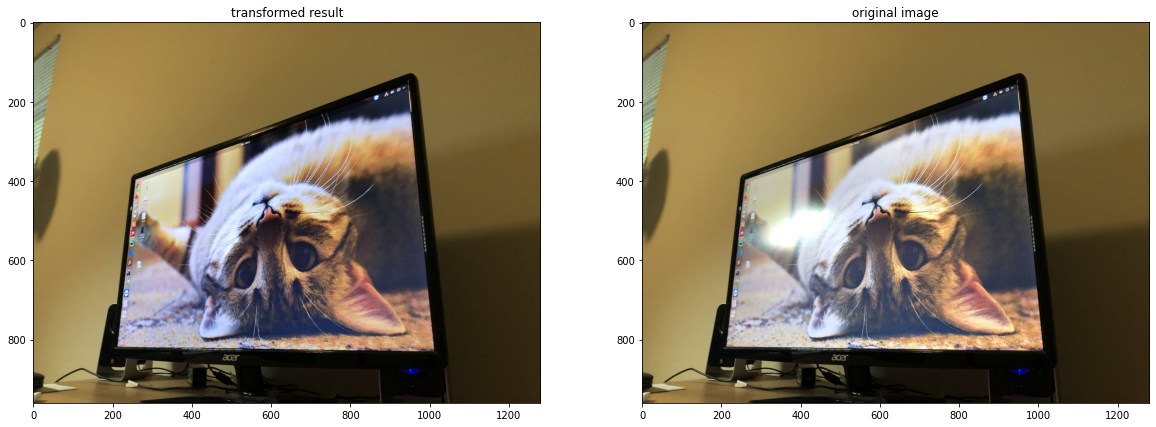

In [21]:
result, mask = projRange(img_3, img_1, H_13, srange=range_3[[0,2,3,1]])
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.title('transformed result')
plt.imshow(result)
plt.subplot(122)
plt.title('original image')
plt.imshow(img_3)